## Collect json resultst to csv

In [1]:
import os
import json
import pandas as pd

# Directory containing the results JSON files
results_dir = "./results"

# Initialize a list to hold the data for the DataFrame
data = []

# Loop through each file in the directory
for filename in os.listdir(results_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(results_dir, filename)
        
        # Load the JSON data
        with open(file_path, "r") as file:
            result_data = json.load(file)
        
        # Extract arguments and metrics summary
        args = result_data.get("args", {})
        metrics_summary = result_data.get("metrics_summary", {})
        
        # Flatten args and metrics summary into a single dictionary
        row_data = {**args, **metrics_summary}
        row_data["model_file"] = filename  # Include the filename for reference
        
        # Append the row data to the list
        data.append(row_data)

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)
df.head()


,model,supervise_nodes,batch_size,max_epochs,eval_every,patience,trainable_embeddings,word_embeddings,test_loss_mean,test_loss_std,...,bin_8_41-45_macro_f1_std,bin_9_46-50_loss_mean,bin_9_46-50_loss_std,bin_9_46-50_accuracy_mean,bin_9_46-50_accuracy_std,bin_9_46-50_weighted_f1_mean,bin_9_46-50_weighted_f1_std,bin_9_46-50_macro_f1_mean,bin_9_46-50_macro_f1_std,model_file
0,PTDeepCBOW,True,128,100,1,10,True,word2vec,0.07495,0.00147,...,0.09196,2.11731,0.26014,0.27778,0.07857,0.23333,0.12571,0.19074,0.07595,PTDeepCBOW_word2vec_True_True.json
1,PTDeepCBOW,False,128,100,1,10,True,glove,0.06821,0.00029,...,0.08994,1.22700,0.04704,0.61111,0.07857,0.60688,0.06772,0.42011,0.04564,PTDeepCBOW_glove_True_False.json
2,PTDeepCBOW,True,128,100,1,10,False,glove,0.06954,0.00043,...,0.02839,1.22952,0.09053,0.44444,0.07857,0.45185,0.08381,0.32593,0.04190,PTDeepCBOW_glove_False_True.json
3,DeepCBOW,True,128,100,1,10,False,glove,0.08615,0.00280,...,0.03409,1.64451,0.33160,0.38889,0.07857,0.40370,0.10890,0.25556,0.05542,DeepCBOW_glove_False_True.json
4,LSTM,False,128,100,1,10,False,word2vec,0.06994,0.00007,...,0.06819,1.28106,0.13778,0.33333,0.13608,0.37196,0.14684,0.18995,0.05709,LSTM_word2vec_False_False.json


In [2]:
# df.to_csv("./results/models_and_results.csv", index=False)

# Import csv results

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./results/models_and_results.csv")
df.head()

,model,supervise_nodes,batch_size,max_epochs,eval_every,patience,trainable_embeddings,word_embeddings,test_loss_mean,test_loss_std,...,bin_8_41-45_macro_f1_std,bin_9_46-50_loss_mean,bin_9_46-50_loss_std,bin_9_46-50_accuracy_mean,bin_9_46-50_accuracy_std,bin_9_46-50_weighted_f1_mean,bin_9_46-50_weighted_f1_std,bin_9_46-50_macro_f1_mean,bin_9_46-50_macro_f1_std,model_file
0,PTDeepCBOW,True,128,100,1,10,True,word2vec,0.07495,0.00147,...,0.09196,2.11731,0.26014,0.27778,0.07857,0.23333,0.12571,0.19074,0.07595,PTDeepCBOW_word2vec_True_True.json
1,PTDeepCBOW,False,128,100,1,10,True,glove,0.06821,0.00029,...,0.08994,1.22700,0.04704,0.61111,0.07857,0.60688,0.06772,0.42011,0.04564,PTDeepCBOW_glove_True_False.json
2,PTDeepCBOW,True,128,100,1,10,False,glove,0.06954,0.00043,...,0.02839,1.22952,0.09053,0.44444,0.07857,0.45185,0.08381,0.32593,0.04190,PTDeepCBOW_glove_False_True.json
3,DeepCBOW,True,128,100,1,10,False,glove,0.08615,0.00280,...,0.03409,1.64451,0.33160,0.38889,0.07857,0.40370,0.10890,0.25556,0.05542,DeepCBOW_glove_False_True.json
4,LSTM,False,128,100,1,10,False,word2vec,0.06994,0.00007,...,0.06819,1.28106,0.13778,0.33333,0.13608,0.37196,0.14684,0.18995,0.05709,LSTM_word2vec_False_False.json


# RQ1: Word order

In [5]:
filtered_df = df[(df["trainable_embeddings"] == False) & (df["supervise_nodes"] == False)]
filtered_df.head()

,model,supervise_nodes,batch_size,max_epochs,eval_every,patience,trainable_embeddings,word_embeddings,test_loss_mean,test_loss_std,...,bin_8_41-45_macro_f1_std,bin_9_46-50_loss_mean,bin_9_46-50_loss_std,bin_9_46-50_accuracy_mean,bin_9_46-50_accuracy_std,bin_9_46-50_weighted_f1_mean,bin_9_46-50_weighted_f1_std,bin_9_46-50_macro_f1_mean,bin_9_46-50_macro_f1_std,model_file
4,LSTM,False,128,100,1,10,False,word2vec,0.06994,0.00007,...,0.06819,1.28106,0.13778,0.33333,0.13608,0.37196,0.14684,0.18995,0.05709,LSTM_word2vec_False_False.json
6,TreeLSTM,False,512,50,1,5,False,word2vec,0.24981,0.00200,...,0.02810,1.30408,0.10785,0.61111,0.07857,0.60688,0.06772,0.42011,0.04564,TreeLSTM_word2vec_False_False.json
11,PTDeepCBOW,False,128,100,1,10,False,word2vec,0.07017,0.00052,...,0.05943,1.22934,0.08335,0.55556,0.07857,0.55899,0.06772,0.38783,0.04564,PTDeepCBOW_word2vec_False_False.json
17,PTDeepCBOW,False,128,100,1,10,False,glove,0.06916,0.00019,...,0.03819,1.16367,0.03474,0.50000,0.00000,0.51111,0.00000,0.35556,0.00000,PTDeepCBOW_glove_False_False.json
22,CBOW,False,128,100,1,10,False,glove,0.10226,0.00643,...,0.02020,2.24933,0.47115,0.33333,0.13608,0.34921,0.09346,0.14392,0.06351,CBOW_glove_False_False.json


In [6]:
filtered_df


,model,supervise_nodes,batch_size,max_epochs,eval_every,patience,trainable_embeddings,word_embeddings,test_loss_mean,test_loss_std,...,bin_8_41-45_macro_f1_std,bin_9_46-50_loss_mean,bin_9_46-50_loss_std,bin_9_46-50_accuracy_mean,bin_9_46-50_accuracy_std,bin_9_46-50_weighted_f1_mean,bin_9_46-50_weighted_f1_std,bin_9_46-50_macro_f1_mean,bin_9_46-50_macro_f1_std,model_file
4,LSTM,False,128,100,1,10,False,word2vec,0.06994,0.00007,...,0.06819,1.28106,0.13778,0.33333,0.13608,0.37196,0.14684,0.18995,0.05709,LSTM_word2vec_False_False.json
6,TreeLSTM,False,512,50,1,5,False,word2vec,0.24981,0.00200,...,0.02810,1.30408,0.10785,0.61111,0.07857,0.60688,0.06772,0.42011,0.04564,TreeLSTM_word2vec_False_False.json
11,PTDeepCBOW,False,128,100,1,10,False,word2vec,0.07017,0.00052,...,0.05943,1.22934,0.08335,0.55556,0.07857,0.55899,0.06772,0.38783,0.04564,PTDeepCBOW_word2vec_False_False.json
17,PTDeepCBOW,False,128,100,1,10,False,glove,0.06916,0.00019,...,0.03819,1.16367,0.03474,0.50000,0.00000,0.51111,0.00000,0.35556,0.00000,PTDeepCBOW_glove_False_False.json
22,CBOW,False,128,100,1,10,False,glove,0.10226,0.00643,...,0.02020,2.24933,0.47115,0.33333,0.13608,0.34921,0.09346,0.14392,0.06351,CBOW_glove_False_False.json
30,TreeLSTM,False,128,100,1,10,False,glove,0.06705,0.00074,...,0.04523,1.44706,0.04787,0.55556,0.07857,0.55899,0.06772,0.38783,0.04564,TreeLSTM_glove_False_False.json
32,LSTM,False,128,100,1,10,False,glove,0.06939,0.00100,...,0.06544,1.93013,0.07655,0.38889,0.07857,0.48148,0.05238,0.22222,0.07857,LSTM_glove_False_False.json
33,ChildSumTreeLSTM,False,512,50,1,5,False,word2vec,0.24765,0.00079,...,0.06770,1.22113,0.03841,0.66667,0.00000,0.65476,0.00000,0.45238,0.00000,ChildSumTreeLSTM_word2vec_False_False.json
34,DeepCBOW,False,128,100,1,10,False,glove,0.08612,0.00114,...,0.06060,1.33329,0.48420,0.61111,0.28328,0.63069,0.26649,0.49947,0.36442,DeepCBOW_glove_False_False.json
36,BOW,False,128,100,1,10,False,glove,0.08381,0.00021,...,0.03786,1.00283,0.06539,0.61111,0.07857,0.62566,0.06952,0.37004,0.06003,BOW_glove_False_False.json


# RQ2: Tree structure

In [7]:
filtered_df = df[
    (df["trainable_embeddings"] == False)
    & (df["supervise_nodes"] == False)
    & (df["model"].isin(["LSTM", "TreeLSTM"]))
]
filtered_df[["model", "word_embeddings", "test_accuracy_mean", "test_accuracy_std", "test_weighted_f1_mean", "test_weighted_f1_std"]]

,model,word_embeddings,test_accuracy_mean,test_accuracy_std,test_weighted_f1_mean,test_weighted_f1_std
4,LSTM,word2vec,0.45596,0.01077,0.42331,0.02241
6,TreeLSTM,word2vec,0.46094,0.00747,0.42987,0.01018
30,TreeLSTM,glove,0.47526,0.00518,0.45795,0.00788
32,LSTM,glove,0.46787,0.00810,0.45811,0.00820


# RQ3: Sentence length

In [8]:
filtered_df = df[
    (df["trainable_embeddings"] == False)
    & (df["supervise_nodes"] == False)
]
# get columns that contain "weighted_f1"
# weighted_f1_columns = [col for col in filtered_df.columns if "weighted_f1" in col]
# filtered_df = filtered_df[["model", "word_embeddings", *weighted_f1_columns]]
# filtered_df


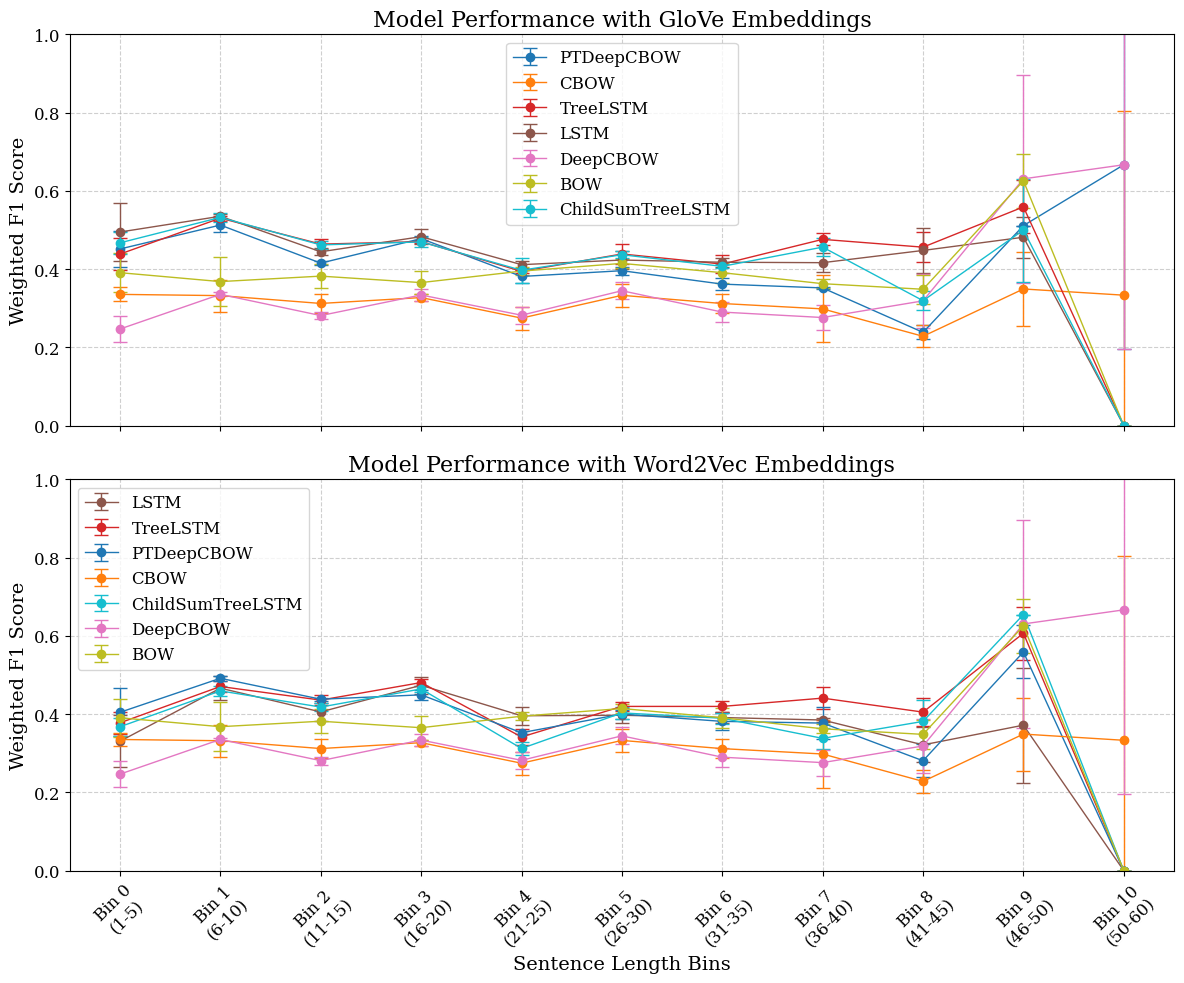

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

glove_df = filtered_df[(filtered_df['word_embeddings'] == 'glove')]
word2vec_df = filtered_df[(filtered_df['word_embeddings'] == 'word2vec') | ((filtered_df['word_embeddings'] == 'glove') & (filtered_df['model'].isin(['BOW', 'CBOW', 'DeepCBOW'])))]

# Get bin columns for weighted_f1
bin_columns = [col for col in glove_df.columns if 'bin' in col and 'weighted_f1_mean' in col]
bin_std_columns = [col for col in glove_df.columns if 'bin' in col and 'weighted_f1_std' in col]

# Extract bin ranges and sentence lengths from column names
bin_info = []
for col in bin_columns:
    parts = col.split('_')
    bin_num = int(parts[1])  # Get the bin number
    length_range = parts[2]  # Get the length range (e.g., '1-5', '6-10')
    bin_info.append((bin_num, length_range, col))

# Sort by bin number
bin_info.sort(key=lambda x: x[0])

# last bin num should be 10
bin_info[-1] = (10, '50-60', bin_columns[1])

# Create sorted lists of columns and labels
bin_columns_sorted = [info[2] for info in bin_info]
bin_std_columns_sorted = [col.replace('mean', 'std') for col in bin_columns_sorted]
x_labels = [f'Bin {info[0]}\n({info[1]})' for info in bin_info]

# Configure fonts and aesthetics
rc('font', family='serif', size=12)
rc('text', usetex=False)  # Set True if LaTeX is available and needed

# Define a color map for models
models = pd.concat([glove_df['model'], word2vec_df['model']]).unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))
model_colors = dict(zip(models, colors))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot GloVe embeddings (top subplot)
for _, row in glove_df.iterrows():
    model = row['model']
    means = [row[col] for col in bin_columns_sorted]
    stds = [row[col] for col in bin_std_columns_sorted]
    
    ax1.errorbar(
        range(len(means)), 
        means, 
        yerr=stds, 
        label=model, 
        marker='o', 
        capsize=5, 
        linestyle='-', 
        linewidth=1,
        color=model_colors[model]
    )

ax1.set_ylabel('Weighted F1 Score', fontsize=14)
ax1.set_title('Model Performance with GloVe Embeddings', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_ylim(0, 1)

# Plot Word2Vec embeddings (bottom subplot)
for _, row in word2vec_df.iterrows():
    model = row['model']
    means = [row[col] for col in bin_columns_sorted]
    stds = [row[col] for col in bin_std_columns_sorted]
    
    ax2.errorbar(
        range(len(means)), 
        means, 
        yerr=stds, 
        label=model, 
        marker='o', 
        capsize=5, 
        linestyle='-', 
        linewidth=1,
        color=model_colors[model]
    )

ax2.set_xlabel('Sentence Length Bins', fontsize=14)
ax2.set_ylabel('Weighted F1 Score', fontsize=14) 
ax2.set_title('Model Performance with Word2Vec Embeddings', fontsize=16)
ax2.set_xticks(range(len(x_labels)))
ax2.set_xticklabels(x_labels, rotation=45, fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('model_performance_comparison.pdf', dpi=1000)
plt.show()

# RQ4: supervise at node level

In [10]:
filtered_df = df[
    (df["trainable_embeddings"] == False)
    & (df["word_embeddings"] == "glove")
]
filtered_df[["model", "supervise_nodes", "test_accuracy_mean", "test_accuracy_std", "test_weighted_f1_mean", "test_weighted_f1_std"]]


,model,supervise_nodes,test_accuracy_mean,test_accuracy_std,test_weighted_f1_mean,test_weighted_f1_std
2,PTDeepCBOW,True,0.44977,0.00242,0.43703,0.00439
3,DeepCBOW,True,0.39427,0.01153,0.38575,0.01687
16,LSTM,True,0.49170,0.01282,0.48241,0.01704
17,PTDeepCBOW,False,0.45430,0.00133,0.43280,0.00291
19,ChildSumTreeLSTM,True,0.48839,0.00405,0.47504,0.00416
22,CBOW,False,0.32006,0.02510,0.31480,0.02037
23,CBOW,True,0.38296,0.00979,0.37497,0.01395
27,BOW,True,0.36546,0.00364,0.36182,0.00151
28,TreeLSTM,True,0.49789,0.00468,0.48876,0.00407
30,TreeLSTM,False,0.47526,0.00518,0.45795,0.00788


# RQ5: N-ary vs Child-Sum TreeLSTM

In [11]:
filtered_df = df[
    (df["trainable_embeddings"] == False)
    & (df["supervise_nodes"] == False)
    & (df["model"].isin(["TreeLSTM", "ChildSumTreeLSTM"]))
]
filtered_df[["model", "word_embeddings", "test_weighted_f1_mean", "test_weighted_f1_std"]]

,model,word_embeddings,test_weighted_f1_mean,test_weighted_f1_std
6,TreeLSTM,word2vec,0.42987,0.01018
30,TreeLSTM,glove,0.45795,0.00788
33,ChildSumTreeLSTM,word2vec,0.40829,0.00446
37,ChildSumTreeLSTM,glove,0.45673,0.01201
